# Proceso de Deep Learning


## Importar datos
* Datos y etiquetas de entrenamiento
* Datos y etiquetas de pruebas

## Explorar datos
* Dimensiones de los datasets de entrenamiento y pruebas
* Valores de las etiquetas


## Preprocesamiento de datos
* Normalización de variables

## Desarrollo del modelo


### Definir la arquitectura del modelo

### Definir los hiper parámetros del modelo

## Entrenar el modelo

## Emplear el modelo entrenado




In [1]:
#Rutinas de inicio
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploración de datos

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Preprocesar


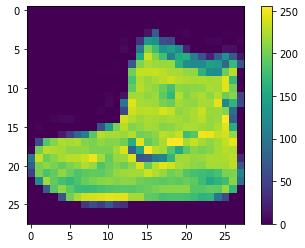

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Aplicar el mismo preprocesamiento al dataset de entrenamiento y de pruebas
train_images = train_images / 255.0

test_images = test_images / 255.0

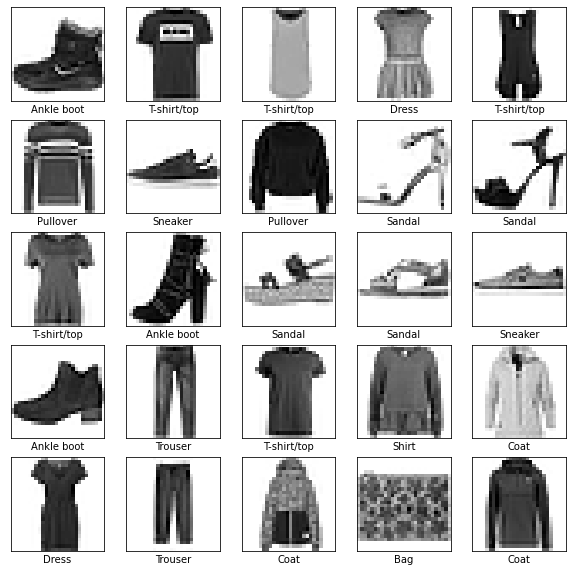

In [11]:
#Verificar que los datos estén en el formato correcto
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Construir el modelo

In [12]:
#Definir las capas del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
#Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.7865
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3459 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [15]:
#Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3333 - accuracy: 0.8838

Test accuracy: 0.8838000297546387


Efectuar predicciones

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.0575220e-05, 3.2749397e-09, 3.5391267e-07, 5.5574878e-09,
       1.0126080e-06, 1.4861672e-03, 1.0582670e-06, 6.0814279e-03,
       1.4185826e-05, 9.9240524e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

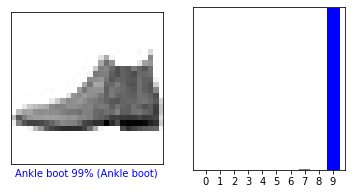

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

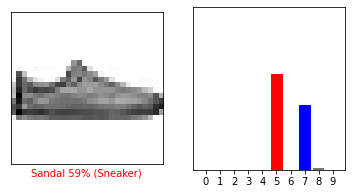

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

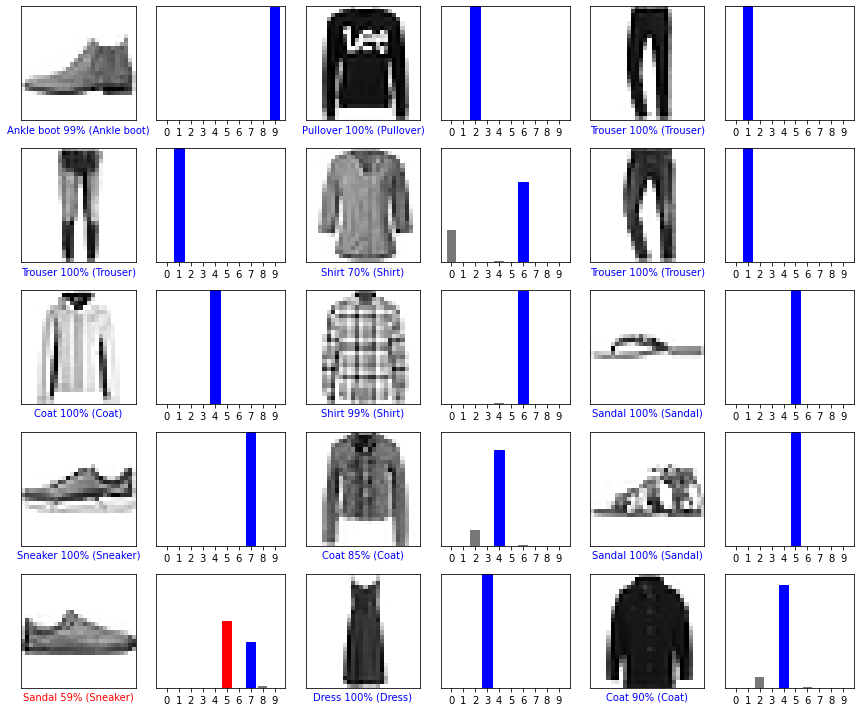

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model  

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7078851e-05 1.3894485e-14 9.9915862e-01 2.5136787e-10 6.7697512e-04
  1.6320683e-12 1.2727814e-04 1.5524561e-18 7.1945808e-13 4.3006755e-15]]


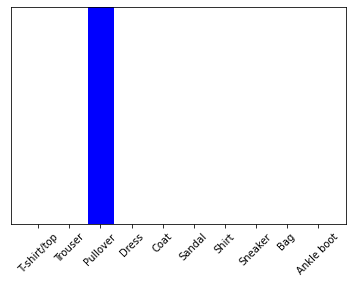

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2